# **Грузинское искусство**

Под искусством Грузии будем понимать:

*   работы художников с грузинскими фамилиями
*   работы, изображающие Грузию
*   работы, сделанные в Грузии



In [2]:
# Импортируем библиотеки

import pandas as pd
import json
import requests
from flatten_json import flatten
import requests
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

### Формирование датасета

Подключимся к API и начнём формировать кусочки датасетов по ключевым словам ("Грузия", "грузинский", "Тбилиси", "Кутаиси") и категориям ("Живопись", "графика", "скульптура", "декоративно-прикладное искусство", "фотографии и негативы"), а также по грузинским фамилиям (окончания "швили", "адзе").

Оптимизируем код для стабильного соединения, добавим паузы между запросами.

In [4]:
# Настройки повторных попыток для стабильного соединения (без этого возникает ошибка)
session = requests.Session()
retries = Retry(total=5, backoff_factor=2, status_forcelist=[500, 502, 503, 504, 408])
session.mount('https://', HTTPAdapter(max_retries=retries))

# API-ключ
API_KEY = "97d32b0ea441f391ddae03b5442e8e7d1da2287c46b18b20b25d901b74aa6930"

# Ключевые слова и категории
keywords = ["Грузия", "грузинский", "Тбилиси", "Кутаиси", "швили", "адзе"]
categories = ["живопись", "графика", "скульптура", "декоративно-прикладное искусство", "фотографии и негативы"]

# Список для хранения всех датафреймов
list_of_all_dfs = []

# Цикл по ключевым словам и категориям
for keyword in keywords:
    for category in categories:
        for s in range(0, 3000, 1000):
            url = f'https://opendata.mkrf.ru/v2/museum-exhibits/$?f={{"data.name":{{"$contain":"{keyword}"}},"data.typology.name":{{"$search":"{category}"}}}}&s={s}&l=1000'
            try:
                response = session.get(url, headers={"X-API-KEY": API_KEY}, timeout=30)
                response.raise_for_status()
                print(f'Запрошены строки с {s} по {s+1000}, статус = {response.status_code}')

                data = response.json().get('data', [])
                df = pd.DataFrame()

                for record in data:
                    ser = pd.Series(flatten(record))
                    df = pd.concat([df, ser.to_frame().T], ignore_index=True)

                if not df.empty:
                    list_of_all_dfs.append(df)

                time.sleep(3)  # Увеличиваем задержку между запросами

            except requests.exceptions.RequestException as e:
                print(f"Ошибка при запросе данных: {e}, пропускаем запрос {s}")
                continue  # Пропускаем итерацию при ошибке

print("Все данные загружены!")

# Объединяем все датафреймы

df_final = pd.concat(list_of_all_dfs, ignore_index=True)
print("Финальный DataFrame собран!")

# Выведем результат
df_final


Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены ст

,_id,nativeId,hash,data_id,data_name,data_description,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,...,changes_0_diff_0_value_deleted,changes_0_diff_0_value_main,data_technologies_11,data_technologies_12,errorFields_1_dataPath,errorFields_1_keyword,errorFields_1_message,errorFields_1_schemaPath,changes_0_diff_0_value_technologies_6,changes_0_diff_0_value_technologies_7
0,5c3e0d7993fa687ca4f74160,1047321,2013-02-17T20:00:00.000Z,1047321,Портрет. Закариажзе С. Б. в роли Маленького ве...,На фоне разноцветных ромбов изображен оплечно ...,1,2758705,Ж 300,КП 305378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e1ba293fa687ca4c3f25e,10804839,2018-02-19T07:02:40.253Z,10804839,"Этюд ""Грузия. Боржоми. Ликани""",На переднем плане уходящая вдаль дорога на зел...,1,10687287,ИЖ-810,ВЭИМ КП-2528/7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e1bc293fa687ca4c5b97a,10850251,2018-02-22T06:40:25.495Z,10850251,"Этюд ""Грузия. Сванетия. Местия""","На переднем плане, на зеленом склоне горы изоб...",1,10730547,ИЖ-889,ВЭИМ КП-2528/87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e1bc293fa687ca4c5b99e,10850256,2018-02-22T06:40:25.495Z,10850256,"Этюд ""Грузия. Сванетия. На подступах к Ушбе""",Изображена коричневая гора со снегом на вершин...,1,10730542,ИЖ-890,ВЭИМ КП-2528/88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e1bc293fa687ca4c5b9c8,10850261,2018-02-22T06:40:31.091Z,10850261,"Этюд ""Грузия. Боржоми-парк""",На переднем плане изображен сад с молодыми зел...,1,10730557,ИЖ-903,ВЭИМ КП-2528/101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,637d3fa5584941407ffc097b,39603528,2022-11-14T13:12:51.695Z,39603528,Фото. Размадзе Г. С.,Фотопортрет Героя Советского Союза Размадзе Га...,1,39420774,,НМ-572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17531,637d3f69cb5f4b407e485299,39607445,2022-11-11T14:33:10.667Z,39607445,"Брежнев Леонид Ильич, генеральный секретарь ЦК...",NaN,1,39388330,И IX 18202,ГИМ 104577/545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17532,637d3f6ecb5f4b407e485c68,39610217,2022-11-11T19:49:28.092Z,39610217,"Абесадзе М., машинист.",NaN,1,39390844,И IX 16169,ГИМ 99529/30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17533,637d3f72cb5f4b407e48614e,39611665,2022-11-12T02:31:46.104Z,39611665,Владиславский Владимир Александрович в роли Аб...,NaN,1,39391825,И IX 16393,ГИМ 99550/471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь соберём строчки с местом создания объекта: "Грузия"

In [19]:
# Настройки повторных попыток для стабильного соединения (без этого возникает ошибка)
session = requests.Session()
retries = Retry(total=5, backoff_factor=2, status_forcelist=[500, 502, 503, 504, 408])
session.mount('https://', HTTPAdapter(max_retries=retries))

# API-ключ
API_KEY = "97d32b0ea441f391ddae03b5442e8e7d1da2287c46b18b20b25d901b74aa6930"

# Ключевые слова и категории
keywords = ["Грузия", "Грузинская ССР"]
categories = ["живопись", "графика", "скульптура", "декоративно-прикладное искусство", "фотографии и негативы"]

# Список для хранения всех датафреймов
georgia_list_of_all_dfs = []

# Цикл по ключевым словам и категориям
for keyword in keywords:
    for category in categories:
        for s in range(0, 5000, 1000):
            url = f'https://opendata.mkrf.ru/v2/museum-exhibits/$?f={{"data.name":{{"$contain":"{keyword}"}},"data.typology.name":{{"$search":"{category}"}}}}&s={s}&l=1000'
            try:
                response = session.get(url, headers={"X-API-KEY": API_KEY}, timeout=30)
                response.raise_for_status()
                print(f'Запрошены строки с {s} по {s+1000}, статус = {response.status_code}')

                data = response.json().get('data', [])
                df = pd.DataFrame()

                for record in data:
                    ser = pd.Series(flatten(record))
                    df = pd.concat([df, ser.to_frame().T], ignore_index=True)

                if not df.empty:
                    georgia_list_of_all_dfs.append(df)

                time.sleep(3)  # Увеличиваем задержку между запросами

            except requests.exceptions.RequestException as e:
                print(f"Ошибка при запросе данных: {e}, пропускаем запрос {s}")
                continue  # Пропускаем итерацию при ошибке

print("Все данные загружены!")

# Объединяем все датафреймы

georgia_df_final = pd.concat(georgia_list_of_all_dfs, ignore_index=True)
print("Финальный DataFrame собран!")

# Выведем результат
georgia_df_final


Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 3000 по 4000, статус = 200
Запрошены строки с 4000 по 5000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 3000 по 4000, статус = 200
Запрошены строки с 4000 по 5000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 3000 по 4000, статус = 200
Запрошены строки с 4000 по 5000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Запрошены строки с 2000 по 3000, статус = 200
Запрошены строки с 3000 по 4000, статус = 200
Запрошены строки с 4000 по 5000, статус = 200
Запрошены строки с 0 по 1000, статус = 200
Запрошены строки с 1000 по 2000, статус = 200
Зап

,_id,nativeId,hash,data_id,data_name,data_description,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,...,changes_2_diff_7_op,changes_2_diff_7_path,changes_2_diff_7_value,changes_0_diff_1_value_url,changes_0_diff_18_value,data_images_3_url,changes_0_diff_5_value_name,changes_0_diff_0_value_length,changes_0_diff_0_value_budget_name,changes_0_diff_0_value_images_2_url
0,5c3e0d7993fa687ca4f74160,1047321,2013-02-17T20:00:00.000Z,1047321,Портрет. Закариажзе С. Б. в роли Маленького ве...,На фоне разноцветных ромбов изображен оплечно ...,1,2758705,Ж 300,КП 305378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e1ba293fa687ca4c3f25e,10804839,2018-02-19T07:02:40.253Z,10804839,"Этюд ""Грузия. Боржоми. Ликани""",На переднем плане уходящая вдаль дорога на зел...,1,10687287,ИЖ-810,ВЭИМ КП-2528/7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e1bc293fa687ca4c5b97a,10850251,2018-02-22T06:40:25.495Z,10850251,"Этюд ""Грузия. Сванетия. Местия""","На переднем плане, на зеленом склоне горы изоб...",1,10730547,ИЖ-889,ВЭИМ КП-2528/87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e1bc293fa687ca4c5b99e,10850256,2018-02-22T06:40:25.495Z,10850256,"Этюд ""Грузия. Сванетия. На подступах к Ушбе""",Изображена коричневая гора со снегом на вершин...,1,10730542,ИЖ-890,ВЭИМ КП-2528/88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e1bc293fa687ca4c5b9c8,10850261,2018-02-22T06:40:31.091Z,10850261,"Этюд ""Грузия. Боржоми-парк""",На переднем плане изображен сад с молодыми зел...,1,10730557,ИЖ-903,ВЭИМ КП-2528/101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,5c3e1d2393fa687ca4db3c69,7853107,2017-05-15T14:51:01.334Z,7853107,Негатив. Торадзе Д. - композитор. Грузинская ССР.,"Погрудный, чуть влево. Без галстука.",1,7739549,Н-21328,ГЦММК КП-4310/166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6105,5c3e165b93fa687ca47842f0,8583231,2017-08-11T13:22:53.337Z,8583231,Негатив. Габичвадзе Р.К. (р. 1913) композитор....,Погрудный. 2 изображения. 1/3 влево и почти 1/...,1,8475588,Н-21849,ГЦММК КП-4865/65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6106,5c3e165b93fa687ca47843a0,8583264,2017-08-11T13:22:53.337Z,8583264,Негатив. Эксанишвили Элеонора Григорьевна (р.1...,"Поясной, 1/3 вправо (почти 1/2). Волосы на пря...",1,8475557,Н-21893,ГЦММК КП-4865/108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6107,5c3e169193fa687ca47b3023,8761714,2017-09-01T11:27:45.622Z,8761714,"Негатив. Выставка ""Творчество композиторов ССС...",NaN,1,8651482,Н-23078,ГЦММК КП-5047/162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Объединим два датафрейма в один
df = pd.concat([georgia_df_final, df_final], ignore_index=True)

df

,_id,nativeId,hash,data_id,data_name,data_description,data_partsCount,data_regNumber,data_invNumber,data_gikNumber,...,changes_0_diff_0_value_deleted,changes_0_diff_0_value_main,data_technologies_11,data_technologies_12,errorFields_1_dataPath,errorFields_1_keyword,errorFields_1_message,errorFields_1_schemaPath,changes_0_diff_0_value_technologies_6,changes_0_diff_0_value_technologies_7
0,5c3e0d7993fa687ca4f74160,1047321,2013-02-17T20:00:00.000Z,1047321,Портрет. Закариажзе С. Б. в роли Маленького ве...,На фоне разноцветных ромбов изображен оплечно ...,1,2758705,Ж 300,КП 305378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e1ba293fa687ca4c3f25e,10804839,2018-02-19T07:02:40.253Z,10804839,"Этюд ""Грузия. Боржоми. Ликани""",На переднем плане уходящая вдаль дорога на зел...,1,10687287,ИЖ-810,ВЭИМ КП-2528/7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e1bc293fa687ca4c5b97a,10850251,2018-02-22T06:40:25.495Z,10850251,"Этюд ""Грузия. Сванетия. Местия""","На переднем плане, на зеленом склоне горы изоб...",1,10730547,ИЖ-889,ВЭИМ КП-2528/87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e1bc293fa687ca4c5b99e,10850256,2018-02-22T06:40:25.495Z,10850256,"Этюд ""Грузия. Сванетия. На подступах к Ушбе""",Изображена коричневая гора со снегом на вершин...,1,10730542,ИЖ-890,ВЭИМ КП-2528/88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e1bc293fa687ca4c5b9c8,10850261,2018-02-22T06:40:31.091Z,10850261,"Этюд ""Грузия. Боржоми-парк""",На переднем плане изображен сад с молодыми зел...,1,10730557,ИЖ-903,ВЭИМ КП-2528/101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,637d3fa5584941407ffc097b,39603528,2022-11-14T13:12:51.695Z,39603528,Фото. Размадзе Г. С.,Фотопортрет Героя Советского Союза Размадзе Га...,1,39420774,,НМ-572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23640,637d3f69cb5f4b407e485299,39607445,2022-11-11T14:33:10.667Z,39607445,"Брежнев Леонид Ильич, генеральный секретарь ЦК...",NaN,1,39388330,И IX 18202,ГИМ 104577/545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23641,637d3f6ecb5f4b407e485c68,39610217,2022-11-11T19:49:28.092Z,39610217,"Абесадзе М., машинист.",NaN,1,39390844,И IX 16169,ГИМ 99529/30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23642,637d3f72cb5f4b407e48614e,39611665,2022-11-12T02:31:46.104Z,39611665,Владиславский Владимир Александрович в роли Аб...,NaN,1,39391825,И IX 16393,ГИМ 99550/471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Очистка и подготовка данных

In [104]:
# Посмотрим названия колонок, чтобы понять, какие можно удалить
for col in df.columns:
    print(col)

# Удаляем все колонки, кроме указанных
columns_to_keep = ['data_name', 'data_description', 'data_museum_name', 'data_typology_name', 'data_startDate', 'data_authors_0', 'data_technologies_0', 'data_productionPlace']
df_cleaned = df.loc[:, columns_to_keep]


_id
nativeId
hash
data_id
data_name
data_description
data_partsCount
data_regNumber
data_invNumber
data_gikNumber
data_type
data_statusId
data_museum_id
data_museum_name
data_museum_code
data_museum_inn
data_typology_id
data_typology_name
data_typology_obsolete
data_typologyDesc
data_width
data_length
data_dimUnit_name
data_dimStr
data_startDate
data_precision
data_periodStr
data_regDate
data_authors_0
data_technologies_0
status
errorFields_0_keyword
errorFields_0_dataPath
errorFields_0_schemaPath
errorFields_0_params_type
errorFields_0_message
nativeName
activated
created
modified
odSetVersions_0
odSetVersion
updateSession
odSchema
dataset
data_productionPlace
data_extSystem
data_images_0_url
data_finishDate
data_extSystem_id
data_technologies_1
data_findPlace
data_mainWords
data_provenance
data_typology_code
changes_0_modified
changes_0_diff_0_op
changes_0_diff_0_path
changes_0_diff_0_value_url
changes_0_diff_1_op
changes_0_diff_1_path
changes_0_diff_2_op
changes_0_diff_2_path
change

In [105]:
df_cleaned

,data_name,data_description,data_museum_name,data_typology_name,data_startDate,data_authors_0,data_technologies_0,data_productionPlace
0,Портрет. Закариажзе С. Б. в роли Маленького ве...,На фоне разноцветных ромбов изображен оплечно ...,Федеральное государственное бюджетное учрежден...,живопись,1968-01-01T12:00:00.000Z,Кочакидзе О.,"Картон, масло",NaN
1,"Этюд ""Грузия. Боржоми. Ликани""",На переднем плане уходящая вдаль дорога на зел...,Государственное бюджетное учреждение культуры ...,живопись,NaN,Художник Язев Иван Андреевич.,Картон. Масло.,СССР.
2,"Этюд ""Грузия. Сванетия. Местия""","На переднем плане, на зеленом склоне горы изоб...",Государственное бюджетное учреждение культуры ...,живопись,NaN,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
3,"Этюд ""Грузия. Сванетия. На подступах к Ушбе""",Изображена коричневая гора со снегом на вершин...,Государственное бюджетное учреждение культуры ...,живопись,NaN,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
4,"Этюд ""Грузия. Боржоми-парк""",На переднем плане изображен сад с молодыми зел...,Государственное бюджетное учреждение культуры ...,живопись,NaN,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
...,...,...,...,...,...,...,...,...
23639,Фото. Размадзе Г. С.,Фотопортрет Героя Советского Союза Размадзе Га...,Муниципальное межпоселенческое бюджетное учреж...,фотографии и негативы,NaN,NaN,NaN,NaN
23640,"Брежнев Леонид Ильич, генеральный секретарь ЦК...",NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1980-01-01T12:00:00.000Z,Филатов И.В.,серебряно-желатиновый отпечаток,"СССР, г. Москва"
23641,"Абесадзе М., машинист.",NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1966-01-01T12:00:00.000Z,Неизвестный фотограф,серебряно-желатиновый отпечаток,"СССР, Грузинская ССР"
23642,Владиславский Владимир Александрович в роли Аб...,NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1947-01-01T12:00:00.000Z,Неизвестный фотограф,серебряно-желатиновый отпечаток,"СССР, г. Москва"


In [106]:
# Удаляем дубликаты
df_cleaned.drop_duplicates(inplace=True)

# Заполняем пропущенные значения
df_cleaned["data_authors_0"].fillna("Неизвестный автор", inplace=True)
df_cleaned["data_typology_name"].fillna("Не указано", inplace=True)
df_cleaned["data_museum_name"].fillna("Не указан", inplace=True)
df_cleaned["data_technologies_0"].fillna("Не указано", inplace=True)


# Чистим пробелы
df_cleaned["data_authors_0"] = df_cleaned["data_authors_0"].str.strip().replace("", "Неизвестный автор")
df_cleaned["data_typology_name"] = df_cleaned["data_typology_name"].str.strip().replace("", "Не указано")
df_cleaned["data_museum_name"] = df_cleaned["data_museum_name"].str.strip().replace("", "Не указан")
df_cleaned["data_technologies_0"] = df_cleaned["data_technologies_0"].str.strip().replace("", "Не указано")


# Преобразуем дату (оставляем только год)
df_cleaned["data_startDate"] = df_cleaned["data_startDate"].astype(str).str[:4]
df_cleaned["data_startDate"] = pd.to_numeric(df_cleaned["data_startDate"], errors="coerce")
df_cleaned["data_startDate"] = df_cleaned["data_startDate"].astype("Int64")

# Результат
print(f"В датафрейме осталось {len(df_cleaned)} записей.")
df_cleaned


В датафрейме осталось 13049 записей.


<ipython-input-106-78452282208d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["data_authors_0"].fillna("Неизвестный автор", inplace=True)
<ipython-input-106-78452282208d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,data_name,data_description,data_museum_name,data_typology_name,data_startDate,data_authors_0,data_technologies_0,data_productionPlace
0,Портрет. Закариажзе С. Б. в роли Маленького ве...,На фоне разноцветных ромбов изображен оплечно ...,Федеральное государственное бюджетное учрежден...,живопись,1968,Кочакидзе О.,"Картон, масло",NaN
1,"Этюд ""Грузия. Боржоми. Ликани""",На переднем плане уходящая вдаль дорога на зел...,Государственное бюджетное учреждение культуры ...,живопись,<NA>,Художник Язев Иван Андреевич.,Картон. Масло.,СССР.
2,"Этюд ""Грузия. Сванетия. Местия""","На переднем плане, на зеленом склоне горы изоб...",Государственное бюджетное учреждение культуры ...,живопись,<NA>,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
3,"Этюд ""Грузия. Сванетия. На подступах к Ушбе""",Изображена коричневая гора со снегом на вершин...,Государственное бюджетное учреждение культуры ...,живопись,<NA>,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
4,"Этюд ""Грузия. Боржоми-парк""",На переднем плане изображен сад с молодыми зел...,Государственное бюджетное учреждение культуры ...,живопись,<NA>,Художник Язев Иван Андреевич.,Картон. Масло.,Грузинская ССР.
...,...,...,...,...,...,...,...,...
23639,Фото. Размадзе Г. С.,Фотопортрет Героя Советского Союза Размадзе Га...,Муниципальное межпоселенческое бюджетное учреж...,фотографии и негативы,<NA>,Неизвестный автор,Не указано,NaN
23640,"Брежнев Леонид Ильич, генеральный секретарь ЦК...",NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1980,Филатов И.В.,серебряно-желатиновый отпечаток,"СССР, г. Москва"
23641,"Абесадзе М., машинист.",NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1966,Неизвестный фотограф,серебряно-желатиновый отпечаток,"СССР, Грузинская ССР"
23642,Владиславский Владимир Александрович в роли Аб...,NaN,Федеральное государственное бюджетное учрежден...,фотографии и негативы,1947,Неизвестный фотограф,серебряно-желатиновый отпечаток,"СССР, г. Москва"


In [107]:
print(df_cleaned[["data_authors_0", "data_typology_name", "data_museum_name"]].isnull().sum())

data_authors_0        0
data_typology_name    0
data_museum_name      0
dtype: int64


In [108]:
# Сохраним наш датасет в .csv
df_cleaned.to_csv("georgian_art_dataset.csv", index=False, encoding="utf-8-sig")

### Анализ данных

**1. Распределение экспонатов по категориям**

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

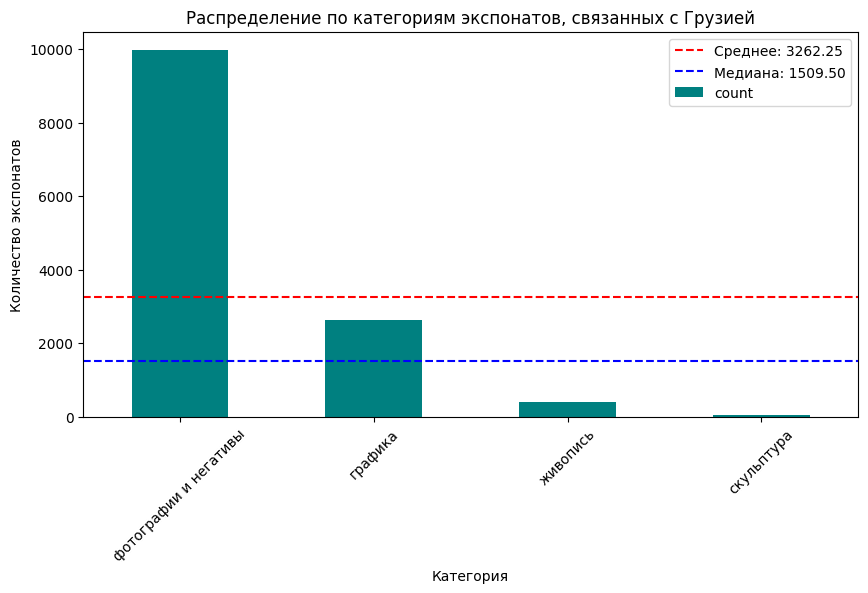

In [57]:
# Считаем количество объектов в каждой категории
category_counts = df_cleaned['data_typology_name'].value_counts()

# Среднее и медиана
mean_value = category_counts.mean()
median_value = category_counts.median()

# Визуализация
plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar', color='teal')
plt.axhline(mean_value, color='red', linestyle='dashed', label=f'Среднее: {mean_value:.2f}')
plt.axhline(median_value, color='blue', linestyle='dashed', label=f'Медиана: {median_value:.2f}')
plt.title("Распределение по категориям экспонатов, связанных с Грузией")
plt.xlabel("Категория")
plt.ylabel("Количество экспонатов")
plt.xticks(rotation=45)
plt.legend()
plt.show()


**2. Посмотрим на распределение по годам**

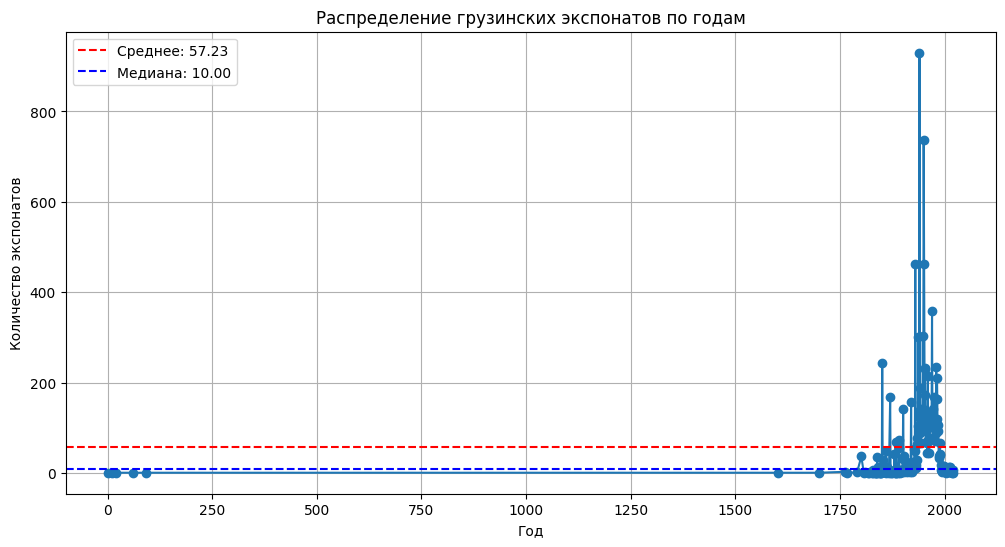

In [58]:
# Группируем по годам
yearly_counts = df_cleaned['data_startDate'].value_counts().sort_index()

# Среднее и медиана
mean_value = yearly_counts.mean()
median_value = yearly_counts.median()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.axhline(mean_value, color='red', linestyle='dashed', label=f'Среднее: {mean_value:.2f}')
plt.axhline(median_value, color='blue', linestyle='dashed', label=f'Медиана: {median_value:.2f}')
plt.title("Распределение грузинских экспонатов по годам")
plt.xlabel("Год")
plt.ylabel("Количество экспонатов")
plt.legend()
plt.grid(True)
plt.show()


**Посмотрим на распределение с 1750 года по 2000 более детально**

Text(0.5, 1.0, 'Распределение грузинских экспонатов (1750–2000)')

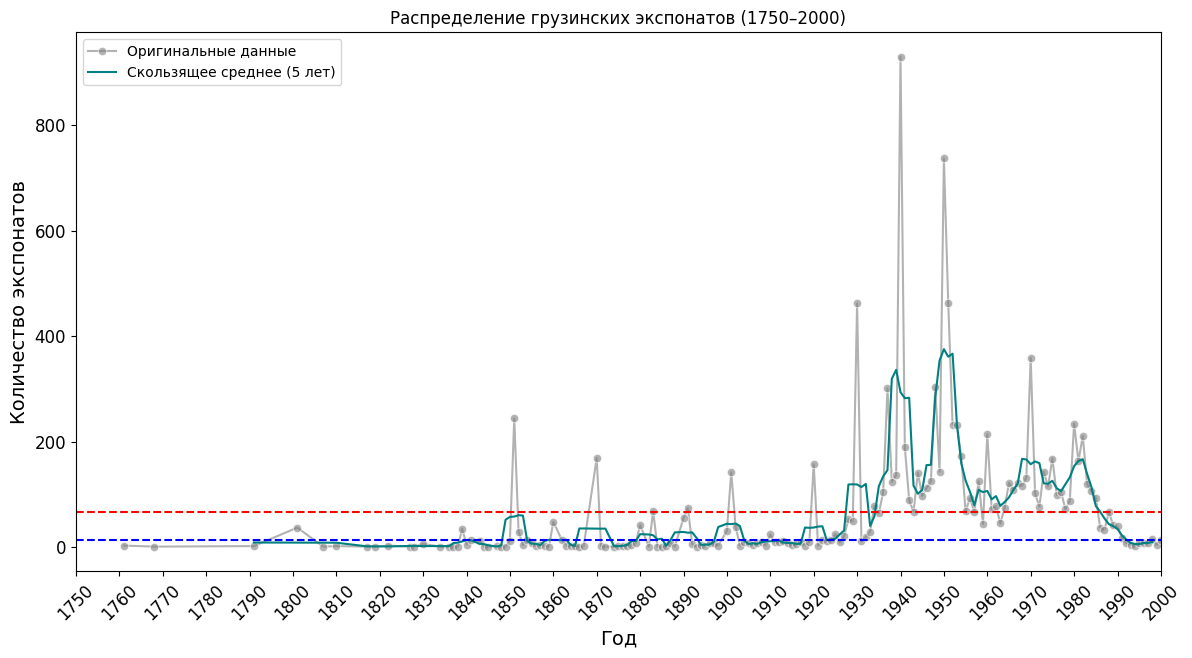

In [75]:
# Фильтруем нужный период (1750–2000)
df_filtered = df_cleaned[(df_cleaned["data_startDate"] >= 1750) & (df_cleaned["data_startDate"] <= 2000)]

# Группируем по годам
yearly_counts = df_filtered["data_startDate"].value_counts().sort_index()

# Среднее и медиана
mean_value = yearly_counts.mean()
median_value = yearly_counts.median()

# Считаем скользящее среднее (чтобы график был плавнее)
rolling_avg = yearly_counts.rolling(window=5, center=True).mean()

# Визуализация
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", label="Оригинальные данные", color="gray", alpha=0.6)
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, marker="", label="Скользящее среднее (5 лет)", color="teal")

# Добавляем среднее и медиану
plt.axhline(mean_value, color="red", linestyle="dashed", label=f"Среднее: {mean_value:.2f}")
plt.axhline(median_value, color="blue", linestyle="dashed", label=f"Медиана: {median_value:.2f}")

# Улучшаем оформление
plt.xlim(1750, 2000)  # Ограничиваем ось X (чтобы убрать шум)
plt.xticks(range(1750, 2001, 10), rotation=45, fontsize=12)  # Отметки каждые 10 лет
plt.yticks(fontsize=12)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Количество экспонатов", fontsize=14)
plt.title("Распределение грузинских экспонатов (1750–2000)")


**3. Распределение по музеям**

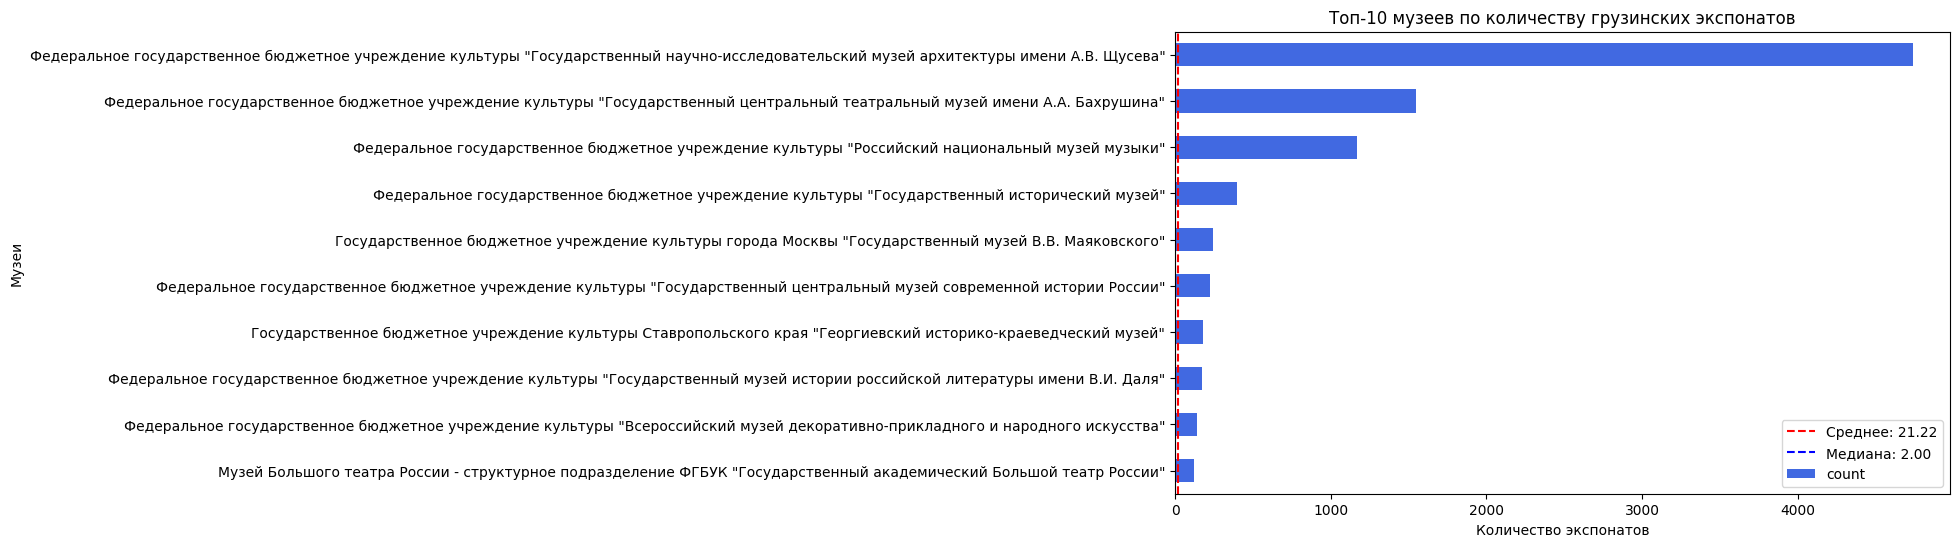

In [62]:
# Группируем по музеям
museum_counts = df_cleaned['data_museum_name'].value_counts()

# Среднее и медиана
mean_value = museum_counts.mean()
median_value = museum_counts.median()

# Берём топ-10 для визуализации
museum_counts_top10 = museum_counts.head(10)

# Визуализация
plt.figure(figsize=(10, 6))
museum_counts_top10.plot(kind='barh', color='royalblue')
plt.axvline(mean_value, color='red', linestyle='dashed', label=f'Среднее: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', label=f'Медиана: {median_value:.2f}')
plt.title("Топ-10 музеев по количеству грузинских экспонатов")
plt.xlabel("Количество экспонатов")
plt.ylabel("Музеи")
plt.gca().invert_yaxis()
plt.legend()
plt.show()


**4. Распределение по технологиям изготовления**

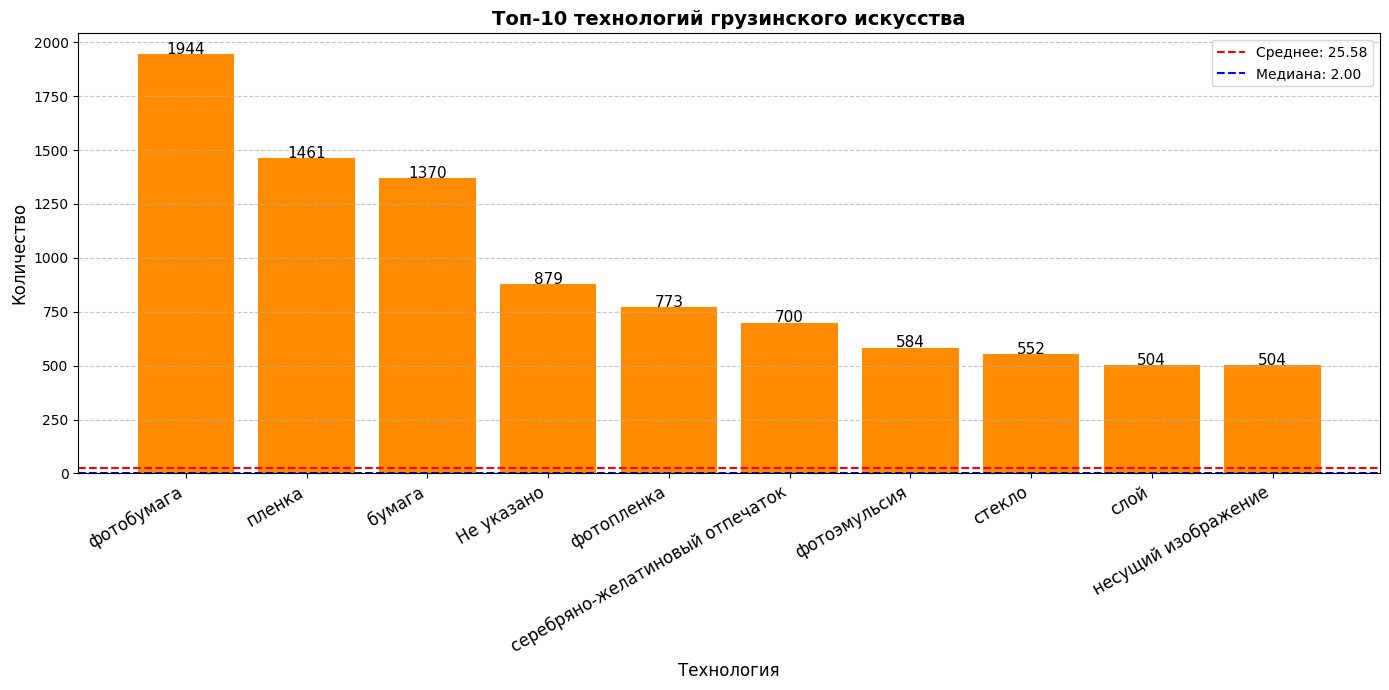

In [61]:
from collections import Counter

# Разворачиваем списки технологий в один общий список
tech_list = df_cleaned['data_technologies_0'].dropna().apply(lambda x: x.split(', ') if isinstance(x, str) else []).sum()

# Считаем популярность технологий
tech_counts = Counter(tech_list)

# Среднее и медиана
values = list(tech_counts.values())
mean_value = np.mean(values)
median_value = np.median(values)

# Преобразуем в DataFrame
df_tech = pd.DataFrame(tech_counts.items(), columns=['Technology', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Визуализация
plt.figure(figsize=(14, 7))  # Увеличиваем размер графика
bars = plt.bar(df_tech['Technology'], df_tech['Count'], color='darkorange')

# Добавляем среднее и медиану
plt.axhline(mean_value, color="red", linestyle="dashed", label=f"Среднее: {mean_value:.2f}")
plt.axhline(median_value, color="blue", linestyle="dashed", label=f"Медиана: {median_value:.2f}")

# Улучшаем подписи
plt.xticks(rotation=30, ha="right", fontsize=12)  # Поворачиваем и выравниваем текст
plt.title("Топ-10 технологий грузинского искусства", fontsize=14, fontweight="bold")
plt.xlabel("Технология", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем значения на колонках
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', fontsize=11)

plt.tight_layout()  # Убираем лишние отступы для лучшего отображения
plt.show()

**5. Самые частые авторы экспонатов**

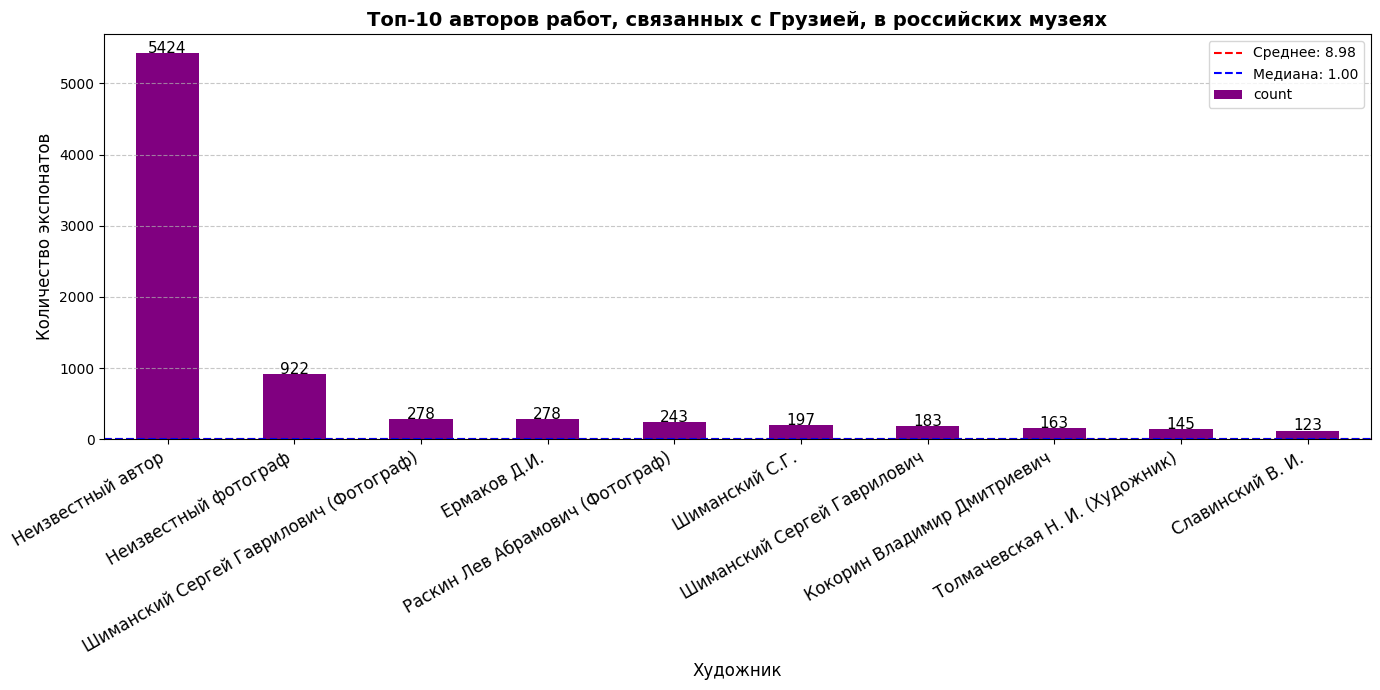

In [65]:
# Группируем по авторам
author_counts = df_cleaned['data_authors_0'].value_counts()

# Среднее и медиана
mean_value = author_counts.mean()
median_value = author_counts.median()

# Берём топ-10 для визуализации
author_counts_top10 = author_counts.head(10)

# Бар-чарт
plt.figure(figsize=(14, 7))  # Увеличиваем размер графика
bars = author_counts_top10.plot(kind='bar', color='purple')

# Добавляем среднее и медиану
plt.axhline(mean_value, color='red', linestyle='dashed', label=f'Среднее: {mean_value:.2f}')
plt.axhline(median_value, color='blue', linestyle='dashed', label=f'Медиана: {median_value:.2f}')

# Улучшаем подписи
plt.xticks(rotation=30, ha="right", fontsize=12)  # Поворачиваем и выравниваем подписи
plt.title("Топ-10 авторов работ, связанных с Грузией, в российских музеях", fontsize=14, fontweight="bold")
plt.xlabel("Художник", fontsize=12)
plt.ylabel("Количество экспонатов", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем значения на столбцах
for bar in bars.containers[0]:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, int(bar.get_height()), ha='center', fontsize=11)

plt.tight_layout()  # Убираем лишние отступы
plt.show()

**Отдельно хотим выделить художников с грузинскими фамилиями (на швили, дзе, ури, ули)**

<ipython-input-67-b7f65546ba4e>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  georgian_authors = df_cleaned[df_cleaned['data_authors_0'].str.contains(r'(швили|дзе|ури|ули)', na=False, case=False, regex=True)]


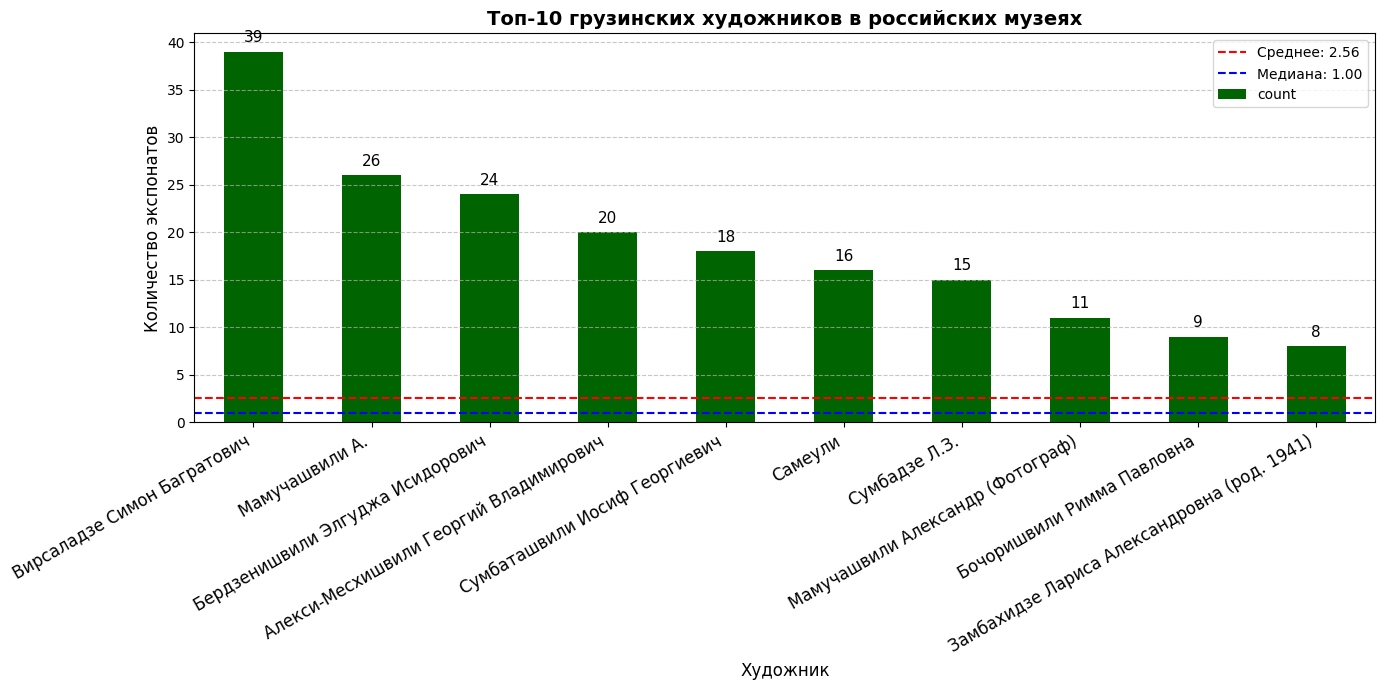

In [67]:
# Фильтруем художников с грузинскими фамилиями
georgian_authors = df_cleaned[df_cleaned['data_authors_0'].str.contains(r'(швили|дзе|ури|ули)', na=False, case=False, regex=True)]

# Считаем количество экспонатов на каждого грузинского художника
georgian_author_counts = georgian_authors['data_authors_0'].value_counts()

# Среднее и медиана
mean_value = georgian_author_counts.mean()
median_value = georgian_author_counts.median()

# Берём топ-10 для визуализации
georgian_author_top10 = georgian_author_counts.head(10)

# Бар-чарт
plt.figure(figsize=(14, 7))
bars = georgian_author_top10.plot(kind='bar', color='darkgreen')

# Добавляем среднее и медиану
plt.axhline(mean_value, color='red', linestyle='dashed', label=f'Среднее: {mean_value:.2f}')
plt.axhline(median_value, color='blue', linestyle='dashed', label=f'Медиана: {median_value:.2f}')

# Улучшаем подписи
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.title("Топ-10 грузинских художников в российских музеях", fontsize=14, fontweight="bold")
plt.xlabel("Художник", fontsize=12)
plt.ylabel("Количество экспонатов", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем значения на столбцах
for bar in bars.containers[0]:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, int(bar.get_height()), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


### **Дополнительно: изучение частотных слов**

**Посмотрим на описания экспонатов типа "живопись", сделаем частотный словарь.**

In [88]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Загружаем русские стоп-слова (если не установлены)
nltk.download('stopwords')
stop_words = set(stopwords.words("russian"))
# Добавляем стоп-слова
custom_stopwords = {"справа", "вправо", "слева", "влево", "плане", "изображение", "изображена", "изображено", "изображен", "изображены",
                    "фрагмент", "переднем", "фоне", "центре", "композиции", "фигуры", "внизу", "четверти", "углу", "части", "видны",
                    "нижнем", "первом", "фронтальное", "стене", "тонах", "две", "домов", "34", "заднем"}

stop_words.update(custom_stopwords)  # Добавляем их в общий список

# Фильтруем только работы в технике "живопись"
df_painting = df_cleaned[df_cleaned["data_typology_name"] == "живопись"]

# Объединяем все описания в один большой текст
text = " ".join(df_painting["data_description"].dropna())

# Очищаем текст
text = text.lower()  # Приводим к нижнему регистру
text = re.sub(r"[^\w\s]", "", text)  # Убираем пунктуацию
words = text.split()  # Разбиваем на слова

# Убираем стоп-слова
words = [word for word in words if word not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(words)

# Выводим топ-20 самых частых слов
top_words = word_counts.most_common(20)
for word, count in top_words:
    print(f"{word}: {count}")


пейзаж: 41
фигура: 41
портрет: 32
дома: 31
цвета: 28
небо: 27
рост: 27
плаще: 22
подпись: 20
красном: 20
погрудное: 19
горы: 18
голова: 18
стены: 18
лицо: 16
городской: 16
мужчины: 16
платье: 15
дом: 14
картины: 14


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Сделаем то же самое с типами "графика" и "фотографии и негативы".

**Частотный словарь по типу "графика"**

In [92]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Загружаем русские стоп-слова (если не установлены)
nltk.download('stopwords')
stop_words = set(stopwords.words("russian"))
# Добавляем стоп-слова
custom_stopwords = {"справа", "вправо", "слева", "влево", "плане", "изображение", "изображена", "изображено", "изображен", "изображены",
                    "фрагмент", "переднем", "фоне", "центре", "композиции", "фигуры", "внизу", "четверти", "углу", "части", "видны",
                    "нижнем", "первом", "фронтальное", "стене", "тонах", "две", "домов", "34", "заднем", "лист", "обороте", "вверху", "pia", "вместе",
                    "цвете", "г", "листа"}

stop_words.update(custom_stopwords)  # Добавляем их в общий список

# Фильтруем только работы в технике "живопись"
df_graphics = df_cleaned[df_cleaned["data_typology_name"] == "графика"]

# Объединяем все описания в один большой текст
text = " ".join(df_graphics["data_description"].dropna())

# Очищаем текст
text = text.lower()  # Приводим к нижнему регистру
text = re.sub(r"[^\w\s]", "", text)  # Убираем пунктуацию
words = text.split()  # Разбиваем на слова

# Убираем стоп-слова
words = [word for word in words if word not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(words)

# Выводим топ-20 самых частых слов
top_words = word_counts.most_common(20)
for word, count in top_words:
    print(f"{word}: {count}")


надпись: 197
цвета: 174
фигура: 116
карандашом: 114
мужчина: 109
эскиз: 105
грузинском: 99
вклеен: 98
альбом: 98
страницу: 97
номерами: 93
рисунок: 89
стоит: 87
тбилиси: 86
дома: 82
мужчины: 80
рост: 80
ссср: 72
голова: 72
русском: 69


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Частотный словарь по типу "фотографии и негативы"**

In [98]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Загружаем русские стоп-слова (если не установлены)
nltk.download('stopwords')
stop_words = set(stopwords.words("russian"))
# Добавляем стоп-слова
custom_stopwords = {"справа", "вправо", "слева", "влево", "плане", "изображение", "изображена", "изображено", "изображен", "изображены",
                    "фрагмент", "переднем", "фоне", "центре", "композиции", "фигуры", "внизу", "четверти", "углу", "части", "видны",
                    "нижнем", "первом", "фронтальное", "стене", "тонах", "две", "домов", "34", "заднем", "лист", "обороте", "вверху", "pia", "вместе",
                    "цвете", "г", "листа", "фото", "фотография", "фотографии", "вид", "изображении", "снимке", "краю", "правом"}

stop_words.update(custom_stopwords)  # Добавляем их в общий список

# Фильтруем только работы в технике "живопись"
df_photo = df_cleaned[df_cleaned["data_typology_name"] == "фотографии и негативы"]

# Объединяем все описания в один большой текст
text = " ".join(df_photo["data_description"].dropna())

# Очищаем текст
text = text.lower()  # Приводим к нижнему регистру
text = re.sub(r"[^\w\s]", "", text)  # Убираем пунктуацию
words = text.split()  # Разбиваем на слова

# Убираем стоп-слова
words = [word for word in words if word not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(words)

# Выводим топ-20 самых частых слов
top_words = word_counts.most_common(20)
for word, count in top_words:
    print(f"{word}: {count}")


аннотация: 290
чертежа: 281
фотокопия: 277
негативе: 243
общий: 233
печатная: 223
подпись: 204
цвета: 200
стороны: 197
стоит: 196
мужчина: 176
рост: 162
проекта: 160
фасада: 159
номер: 154
дата: 154
чернобелая: 150
сидит: 138
глянцевая: 127
фрески: 122


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Создадим словарь грузинского искусства и сохраним его в .csv**

In [102]:
text = " ".join(df_cleaned["data_description"].dropna()).lower()

# Очищаем текст
text = re.sub(r"[^\w\s]", "", text)  # Убираем пунктуацию
words = text.split()  # Разбиваем на слова

# 3Убираем стоп-слова
words = [word for word in words if word not in stop_words]

# Подсчёт частоты слов
word_counts = Counter(words)

# Преобразуем в DataFrame
df_word_freq = pd.DataFrame(word_counts.items(), columns=["Слово", "Частота"]).sort_values(by="Частота", ascending=False)

df_word_freq

,Слово,Частота
210,цвета,407
161,надпись,307
4,мужчина,296
3660,аннотация,290
205,стоит,290
...,...,...
16846,экспозиции,1
16847,посвященной,1
20,толстые,1
23,темносинюю,1


In [103]:
# Сохраняем в CSV
df_word_freq.to_csv("georgian_art_dictionary.csv", index=False, encoding="utf-8-sig")

### **Сделаем быстрый анализ-саммари с помощью ИИ**


**Семантический анализ топ-50 слов**

***1. Описание цвета и техники:***

цвета (407), чертежа (281), печатная (223), чернобелая (157), глянцевая (127), карандашом (149)

Частое упоминание цветовых характеристик и техник исполнения свидетельствует о значительной роли технического описания в архивных данных.

***2. Персонажи и фигуры:***

мужчина (296), женщина (130), фигура (179), портрет (223), профиль (146), стоят (136)

Высокая частота слов, относящихся к изображению людей, указывает на распространённость портретных и фигуративных сюжетов в грузинском искусстве.

***3. Описание формы и расположения:***

стоит (290), рост (272), голова (223), руки (166), погрудное (116), профиль (146)

Вероятно, многие описания содержат характеристики поз и композиций персонажей, что может свидетельствовать о важности жестов и анатомических деталей.

***4. Архитектура и объекты:***

фасада (180), дома (163), церковь (116), фрески (129)

Высокая частотность архитектурных терминов указывает на значительное представительство архитектурных изображений и религиозной живописи в грузинском искусстве.

***5. География и грузинская культура:***

тбилиси (174), грузия (136), грузинском (120)

Присутствие топонимов и национальных характеристик подтверждает связь произведений с грузинским культурным контекстом.

**Специфика грузинского искусства**

Словарь демонстрирует высокую частотность слов, относящихся к религиозной живописи, архитектурным объектам и портретным изображениям. Наличие терминов, связанных с фресками и церковным искусством, подтверждает влияние византийской и православной традиции. В то же время встречаются слова, связанные с более поздними этапами искусства, включая портретную живопись и фигуративные композиции.

Отличительной чертой является значительное количество терминов, относящихся к архивному описанию, что может свидетельствовать о высокой степени документированности музейных экспонатов.

**Палитра -- просто красивое дополнение к анализу :)**

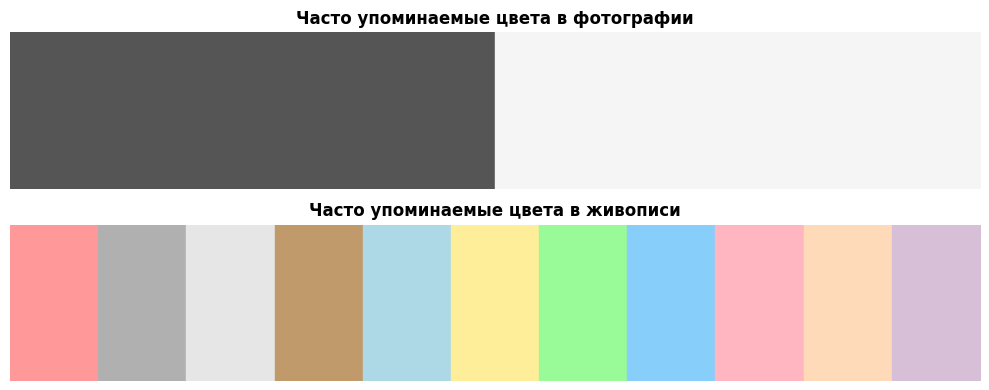

In [109]:
# Разделяем цвета для фотографии (черный, белый) и живописи (остальные)
photo_colors = {"черный": "#555555", "белый": "#F5F5F5"}
painting_colors = {
    "красный": "#FF9999", "серый": "#B0B0B0", "светлый": "#E6E6E6", "коричневый": "#C19A6B",
    "голубой": "#ADD8E6", "желтый": "#FFEE99", "зеленый": "#98FB98", "синий": "#87CEFA",
    "розовый": "#FFB6C1", "оранжевый": "#FFDAB9", "фиолетовый": "#D8BFD8"
}

# Визуализация разделённых палитр
fig, axes = plt.subplots(2, 1, figsize=(10, 4))

# Палитра для фотографии
axes[0].set_title("Часто упоминаемые цвета в фотографии", fontsize=12, fontweight="bold")
for i, hex_value in enumerate(photo_colors.values()):
    axes[0].fill_between([i, i + 1], 0, 1, color=hex_value)
axes[0].set_xlim(0, len(photo_colors))
axes[0].set_ylim(0, 1)
axes[0].axis("off")

# Палитра для живописи
axes[1].set_title("Часто упоминаемые цвета в живописи", fontsize=12, fontweight="bold")
for i, hex_value in enumerate(painting_colors.values()):
    axes[1].fill_between([i, i + 1], 0, 1, color=hex_value)
axes[1].set_xlim(0, len(painting_colors))
axes[1].set_ylim(0, 1)
axes[1].axis("off")

plt.tight_layout()
plt.show()
